In [1]:
# Load requires libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"D:\lending_club_loan_two.csv")

In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [11]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [13]:
# Drop rows with missing values
df.dropna(axis=0,inplace=True)

In [23]:
# Verifying the shape of the dataset after dropping missing values
df.shape

(335867, 27)

In [25]:
#Correlations
df_numerics = df.select_dtypes(include=np.number)
df_numerics.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.152343,0.954389,0.332249,0.025575,0.182939,-0.084163,0.326279,0.096735,0.210965,0.223525,-0.113072
int_rate,0.152343,1.000000,0.143929,-0.072660,0.165525,-0.000987,0.050887,-0.022233,0.272139,-0.045259,-0.080872,0.048943
installment,0.954389,0.143929,1.000000,0.325684,0.019782,0.170809,-0.076195,0.313486,0.119020,0.188000,0.193947,-0.106835
annual_inc,0.332249,-0.072660,0.325684,1.000000,-0.186109,0.125963,-0.010890,0.298209,0.024753,0.184844,0.238526,-0.048525
dti,0.025575,0.165525,0.019782,-0.186109,1.000000,0.293616,-0.054766,0.133560,0.181008,0.219547,-0.058005,-0.047314
open_acc,0.182939,-0.000987,0.170809,0.125963,0.293616,1.000000,-0.026064,0.213355,-0.144381,0.678332,0.107756,-0.034551
pub_rec,-0.084163,0.050887,-0.076195,-0.010890,-0.054766,-0.026064,1.000000,-0.105937,-0.087818,0.016102,0.013190,0.694375
revol_bal,0.326279,-0.022233,0.313486,0.298209,0.133560,0.213355,-0.105937,1.000000,0.223014,0.181978,0.199006,-0.129155
revol_util,0.096735,0.272139,0.119020,0.024753,0.181008,-0.144381,-0.087818,0.223014,1.000000,-0.112061,0.009467,-0.100703
total_acc,0.210965,-0.045259,0.188000,0.184844,0.219547,0.678332,0.016102,0.181978,-0.112061,1.000000,0.378631,0.039574


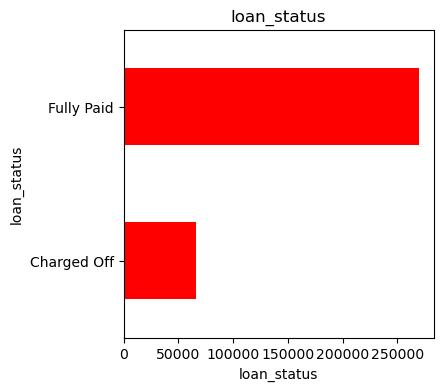

In [27]:
#Age category
fig, ax = plt.subplots(figsize=(4, 4))
df["loan_status"].value_counts().head(10).sort_values(ascending=True).plot(
    kind="barh", color='r', ax=ax, title="loan_status")
ax.set_xlabel("loan_status")
plt.show()

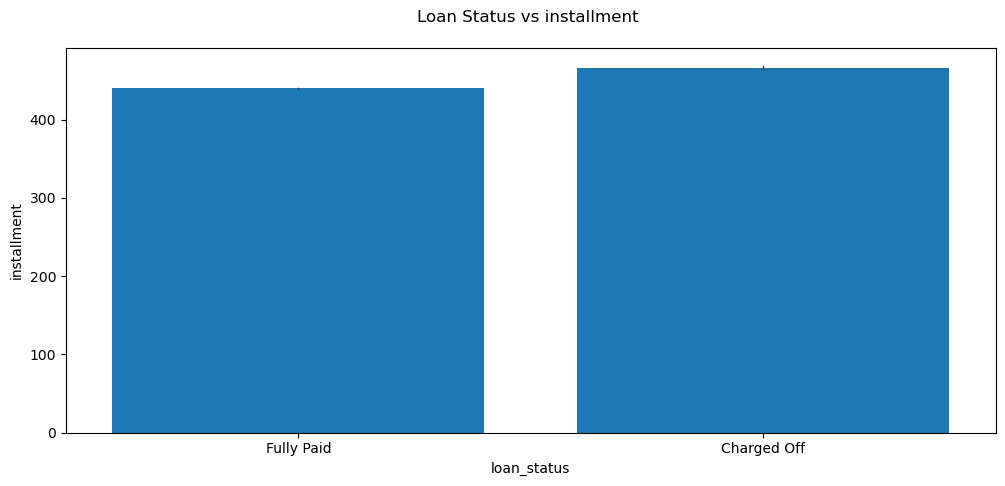

In [29]:
plt.figure(figsize=(12,5))
sns.barplot(x='loan_status', y = 'installment', data = df, errwidth=1,saturation=1)
plt.title('Loan Status vs installment \n')
plt.show()

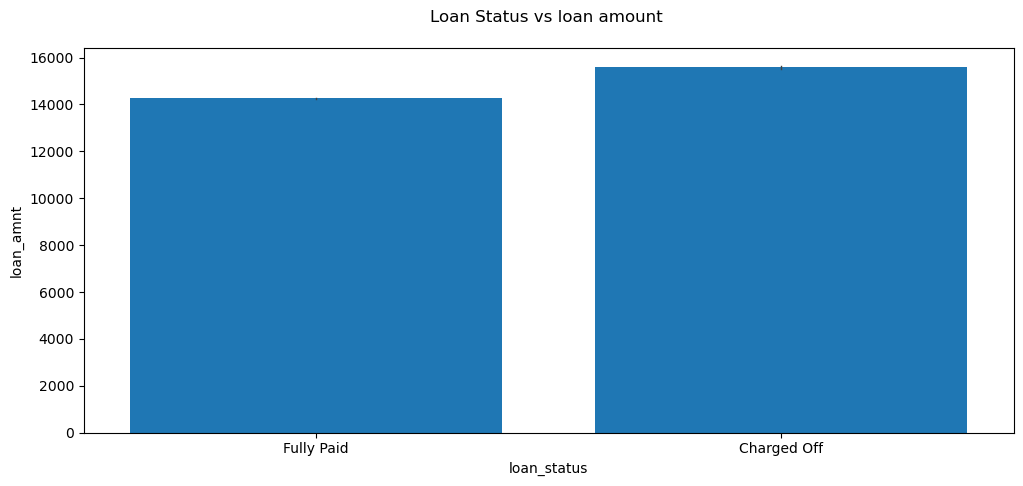

In [31]:
plt.figure(figsize=(12,5))
sns.barplot(x='loan_status', y = 'loan_amnt', data = df, errwidth=1,saturation=1)
plt.title('Loan Status vs loan amount \n')
plt.show()

<Axes: xlabel='application_type', ylabel='count'>

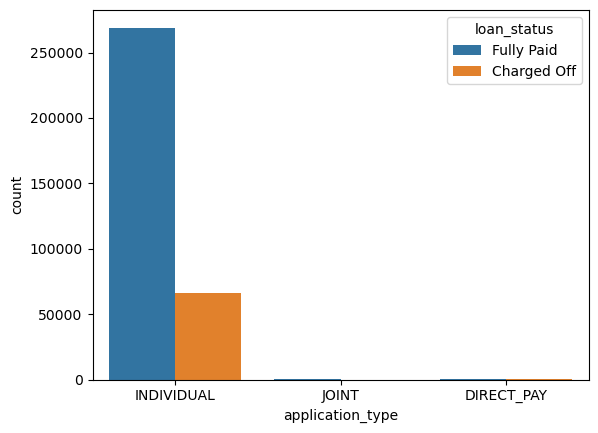

In [33]:
sns.countplot(x= 'application_type', hue=df['loan_status'], data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'vacation'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'other'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'car'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'house'),
  Text(11, 0, 'wedding'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

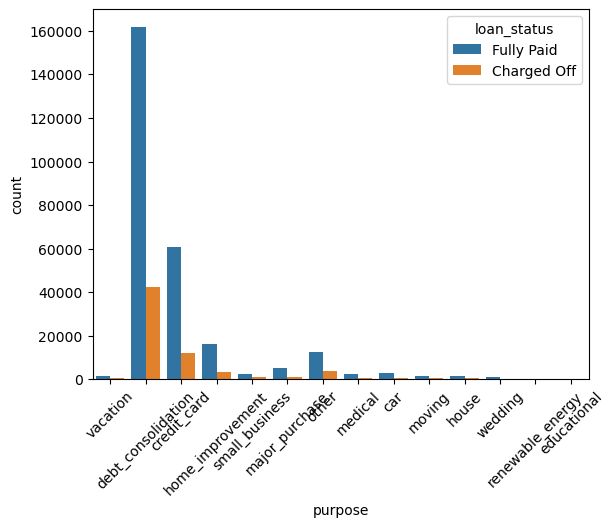

In [35]:
sns.countplot(x= 'purpose', hue=df['loan_status'], data=df)
plt.xticks(rotation=45)

In [39]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [41]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
encoder = LabelEncoder()
scaler = StandardScaler()

In [43]:
# Encoding the categorical features
categorical_features = X.select_dtypes(include=['object']).columns
for col in categorical_features:
    X[col] = encoder.fit_transform(X[col])
X[categorical_features] = scaler.fit_transform(X[categorical_features])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
log = LogisticRegression(solver='liblinear')
log.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [49]:
y_pred_log = log.predict(X_test)

In [51]:
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy Score of Logistic Regression is : {acc_log}")

Accuracy Score of Logistic Regression is : 0.8034656265817132


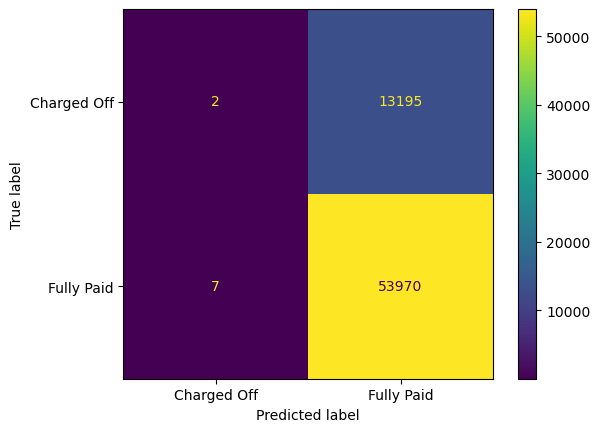

In [53]:
from sklearn import metrics
confusion_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_log, display_labels = ['Charged Off', 'Fully Paid'])
cm_display.plot()
plt.show()

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(max_depth=9, max_features="log2", n_estimators=25)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=25)

In [59]:
y_pred_rf = rf.predict(X_test)

In [61]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy score of Random forest is:", accuracy_rf)

Accuracy score of Random forest is: 0.8055646529907404


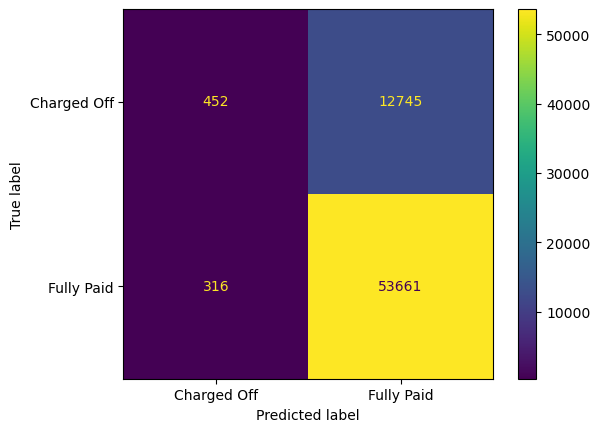

In [63]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_rf, display_labels = ['Charged Off', 'Fully Paid'])
cm_display.plot()
plt.show()

KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred_knn = knn.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score of KNN Classifier is : {acc_knn}")

Accuracy Score of KNN Classifier is : 0.7695834697948611


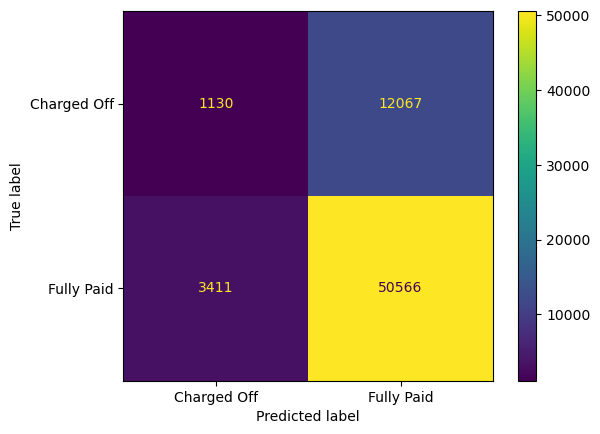

In [69]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = ['Charged Off', 'Fully Paid'])
cm_display.plot()
plt.show()

In [71]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [73]:
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Accuracy Score of Gradient Boosting Classifier is : {gb_acc}")

Accuracy Score of Gradient Boosting Classifier is : 0.8068746836573675


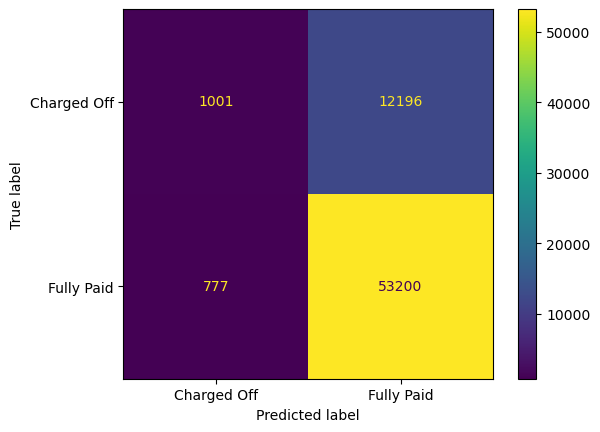

In [75]:
confusion_matrix_gb = metrics.confusion_matrix(y_test, gb_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_gb, display_labels = ['Charged Off', 'Fully Paid'])
cm_display.plot()
plt.show()

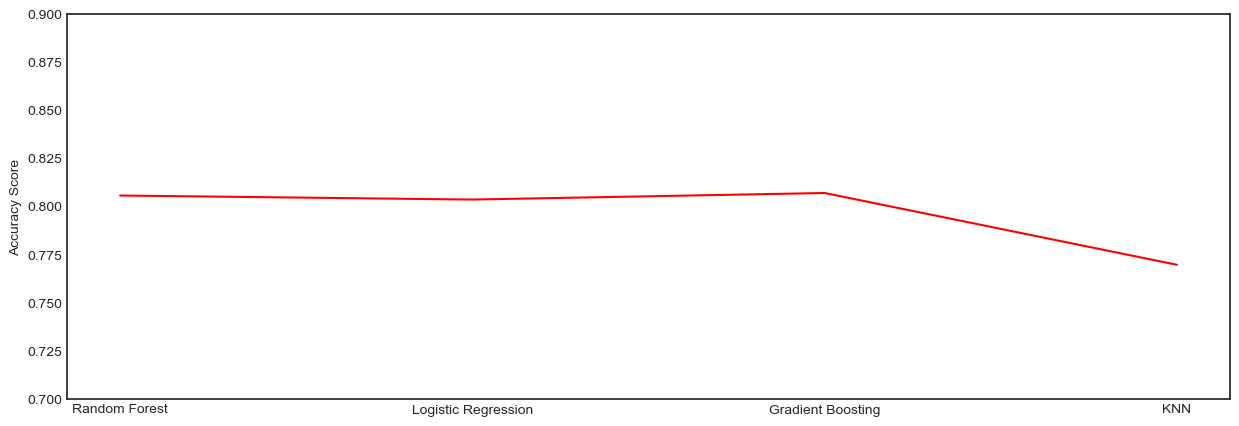

In [77]:
# import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(15, 5))
models = ['Random Forest','Logistic Regression','Gradient Boosting','KNN']
test_accuracy = [accuracy_rf, acc_log, gb_acc, acc_knn,]
plt.plot(models, test_accuracy, color='red')
plt.ylim(0.70, 0.90)
plt.ylabel("Accuracy Score")
plt.show()

Model Hyperparameter Tune using Grid Search

Random Forest Model

In [79]:
param_grid = {'n_estimators': [25],
              'max_features': ['sqrt'],
              'max_depth': [3],
              'max_leaf_nodes': [3],
}

In [81]:
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_estimator_)

RandomForestClassifier(max_depth=3, max_leaf_nodes=3, n_estimators=25)


In [83]:
rf_hyper_pred = grid_search_rf.predict(X_test)

In [85]:
# Accuracy Score on test dataset
rf_accuracy_test = accuracy_score(y_test,rf_hyper_pred)
print('accuracy_score on test dataset : ', rf_accuracy_test)

accuracy_score on test dataset :  0.8035400601423169


In [87]:
y_rf_prob = grid_search_rf.predict_proba(X_test)[:, 1] 

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_rf_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

In [91]:
roc_auc_rf = roc_auc_score(y_test, y_rf_prob) 
roc_auc_rf

0.6968460387672185

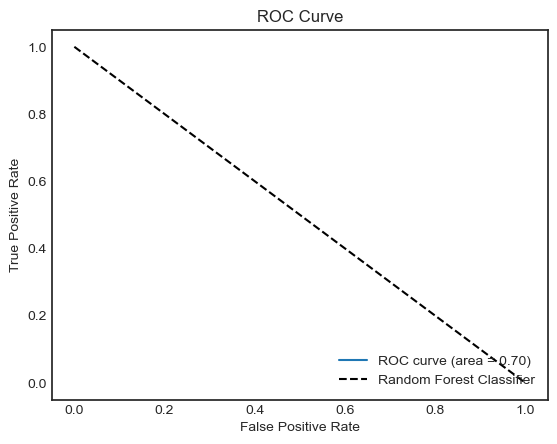

In [93]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_rf) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [1, 0], 'k--', label='Random Forest Classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

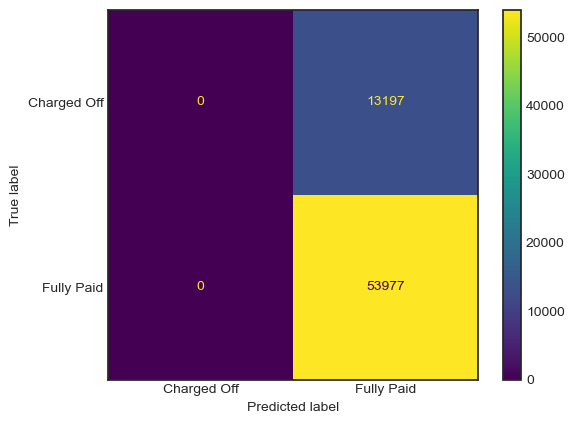

In [95]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_hyper_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = ['Charged Off', 'Fully Paid'])
cm_display.plot()
plt.show()

Logistic Regression

In [97]:
param_grid = [    
    {'penalty' : ['l1'],
    'solver' : ['liblinear'],
    'max_iter' : [100]
    }
]

In [99]:
Log_tune = GridSearchCV(log, param_grid = param_grid)

In [101]:
Log_tune.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'max_iter': [100], 'penalty': ['l1'],
                          'solver': ['liblinear']}])

In [103]:
log_tune_y_pred = Log_tune.predict(X_test)

In [105]:
# Accuracy Score on test dataset
log_tune_acc = accuracy_score(y_test,log_tune_y_pred)
print('accuracy_score on test dataset : ', log_tune_acc)

accuracy_score on test dataset :  0.8055497662786197


In [107]:
# compute ROC AUC 
y_log_prob = Log_tune.predict_proba(X_test)[:, 1] 

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_log_prob, pos_label=1)

In [111]:
roc_auc_log = roc_auc_score(y_test, y_log_prob) 
roc_auc_log

0.7148381977287133

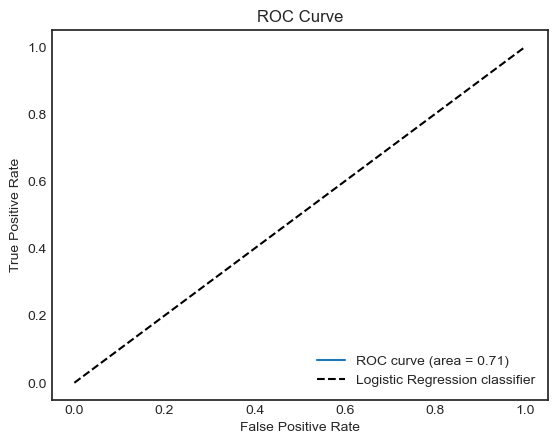

In [113]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_log) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Logistic Regression classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

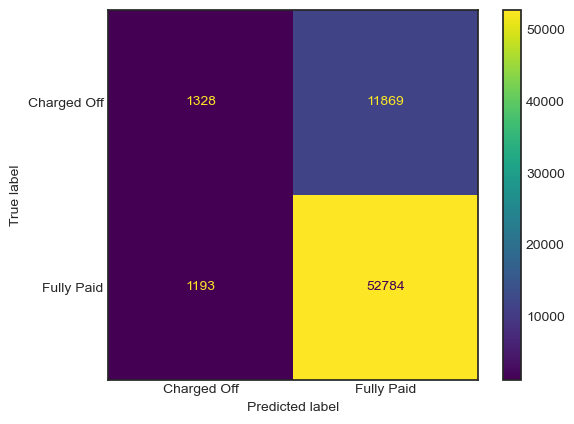

In [115]:
log_confusion_matrix = metrics.confusion_matrix(y_test, log_tune_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(log_confusion_matrix, display_labels = ['Charged Off', 'Fully Paid'])
cm_display.plot()
plt.show()

Gradient Boosting tune

In [117]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
}

In [119]:
# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy')

In [126]:
# Fit the model to the training data using GridSearchCV
grid_search_gb.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01], 'max_depth': [3],
                         'n_estimators': [50]},
             scoring='accuracy')

In [124]:
# Make predictions on the test set using the best model
y_pred_gb_tune = grid_search_gb.predict(X_test)

In [123]:
# Accuracy Score on test dataset
gb_tune_acc = accuracy_score(y_test,y_pred_gb_tune)
print('accuracy_score on test dataset : ', gb_tune_acc)

accuracy_score on test dataset :  0.8035400601423169


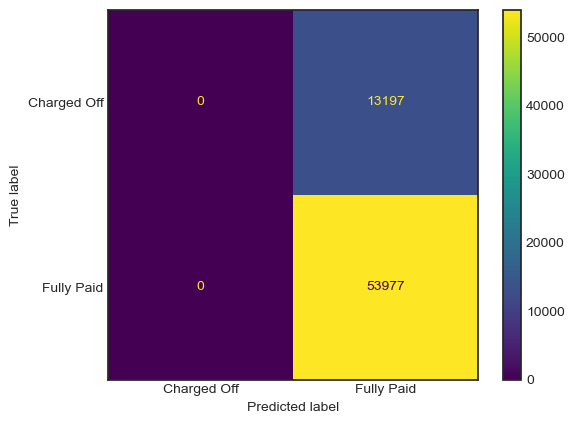

In [141]:
gb_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gb_tune)
cm_display = metrics.ConfusionMatrixDisplay(gb_confusion_matrix, display_labels = ['Charged Off', 'Fully Paid'])
cm_display.plot()
plt.show()

In [143]:
#compute ROC AUC 
y_gb_prob = grid_search_gb.predict_proba(X_test)[:, 1] 

In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_gb_prob, pos_label=1)

In [147]:
roc_auc_gb = roc_auc_score(y_test, y_gb_prob) 
roc_auc_gb

0.7018995672101893

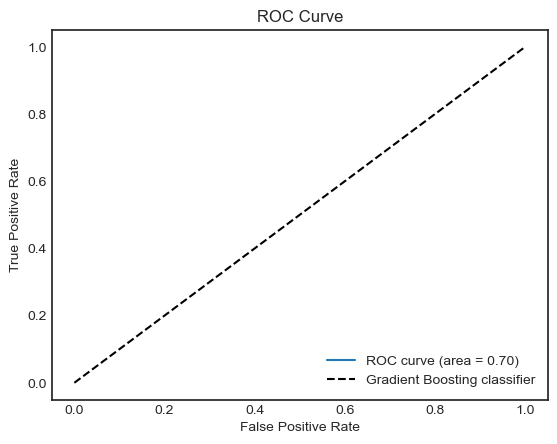

In [149]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_gb) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Gradient Boosting classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

Feature Importance in Logistic Regression

In [151]:
importance = log.coef_
importance

array([[-9.84297263e-05, -2.19921880e-03, -4.17369845e-03,
         2.64076710e-03, -4.28729642e-03, -4.38548932e-03,
        -5.33464716e-04, -1.03378217e-04, -6.08301237e-04,
         1.44841699e-05, -1.48437367e-03,  5.99776650e-05,
        -5.42403208e-04,  2.60089844e-04,  2.92028286e-03,
        -1.50163333e-06,  4.68662848e-03,  3.18058439e-05,
        -1.60628148e-06,  2.34095501e-03,  1.50466945e-02,
         8.10552088e-05,  2.26447207e-04,  2.22372509e-03,
         1.55290432e-04,  3.42179363e-05]])